In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 


#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_change(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        last_gw = ""
        cnt = 0
        for index, row in gw_data.iterrows():
            if last_gw != row['gateway']:
                last_gw = row['gateway']
                cnt+=1
        sum_change +=cnt
    return sum_change/len(dirs)


# Static gateway changes reading

In [3]:
INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredGreedy=  mean(numbers)

INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredRandom=  mean(numbers)
#wiredRandom = 0

INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredPower2 = mean(numbers)

INPUT_DIR = os.path.join("wired/static/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wiredStatic = mean(numbers)

# Wireless static gateway changes reading

In [2]:
INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wirelessGreedy=  mean(numbers)

INPUT_DIR = os.path.join("power2/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wirelessPower2 = mean(numbers)

INPUT_DIR = os.path.join("randomPower2/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wirelessRandom = mean(numbers)

INPUT_DIR = os.path.join("select_once/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wirelessSelectOnce = mean(numbers)

# Mobility gateway changes reading

In [4]:
INPUT_DIR = os.path.join("brute/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
mobilityGreedy=  mean(numbers)

INPUT_DIR = os.path.join("power2/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
mobilityPower2 = mean(numbers)

INPUT_DIR = os.path.join("randomPower2/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
mobilityRandom = mean(numbers)



INPUT_DIR = os.path.join("select_once/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
mobilitySelectOnce = mean(numbers)

# Plots for the number of gateway changes for 100 rounds of measurement round

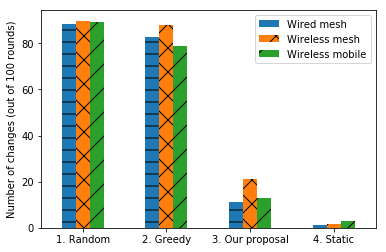

In [5]:

df = pd.DataFrame({
    'Wired mesh':pd.Series({'2. Greedy':wiredGreedy, 
                  '1. Random':wiredRandom, 
                  '3. Our proposal':wiredPower2,
                  '4. Static': wiredStatic}),    
    'Wireless mesh':pd.Series({'2. Greedy':wirelessGreedy,
                     '1. Random':wirelessRandom,
                     '3. Our proposal':wirelessPower2,
                     '4. Static':wirelessSelectOnce}),    
    'Wireless mobile':pd.Series({'2. Greedy':mobilityGreedy, 
                       '1. Random':mobilityRandom, 
                       '3. Our proposal':mobilityPower2, 
                       '4. Static':mobilitySelectOnce})
})


ax = df.plot.bar(rot=360)

bars = ax.patches
patterns =('-', 'x','/')
hatches = [p for p in patterns for i in range(len(df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    
plt.ylabel("Number of changes (out of 100 rounds)")
plt.legend(loc='best')
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')

def read_clients_per_gateway(dir_name):
    headers = ['time', 'gateway']
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    #groupDf = pd.DataFrame(columns=["time","gateway","users"])
    return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count()
    #return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean()


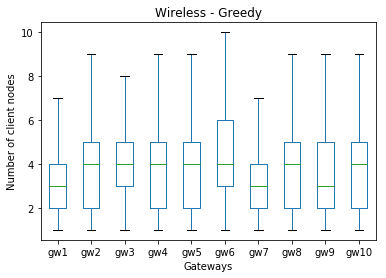

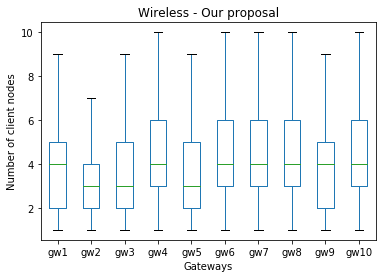

OSError: [Errno 2] No such file or directory: '/home/khulan/mn/selectionLayer/randomPower2/wired/gwChange'

In [56]:
INPUT_DIR = os.path.join("brute/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

ax = numbers.unstack().plot(kind='box',showfliers=False)
ax.set_xticklabels(columns)
plt.title('Wireless - Greedy')
plt.ylabel('Number of client nodes')
plt.xlabel('Gateways')
plt.show()


INPUT_DIR = os.path.join("power2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    #print(type(temp))
    numbers= numbers.append(temp)

df= pd.DataFrame()
ax= numbers.unstack().plot(kind='box',showfliers=False)
ax.set_xticklabels(columns)
plt.title('Wireless - Our proposal')
plt.ylabel('Number of client nodes')
plt.xlabel('Gateways')
plt.show()


INPUT_DIR = os.path.join("randomPower2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    #print(type(temp))
    numbers= numbers.append(temp)

ax = numbers.unstack().plot(kind='box',showfliers=False)

ax.set_xticklabels(columns)
plt.title('Wireless - Random power 2')
plt.ylabel('Number of client nodes')
plt.xlabel('Gateways')
plt.show()



INPUT_DIR = os.path.join("complete_random/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    #print(type(temp))
    numbers= numbers.append(temp)

ax = numbers.unstack().plot(kind='box',showfliers=False)

ax.set_xticklabels(columns)
plt.title('Wireless - Random')
plt.ylabel('Number of client nodes')
plt.xlabel('Gateways')
plt.show()


INPUT_DIR = os.path.join("select_once/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    #print(type(temp))
    numbers= numbers.append(temp)

ax = numbers.unstack().plot(kind='box',showfliers=False)
ax.set_xticklabels(columns)
plt.title('Wireless - Static')
plt.ylabel('Number of client nodes')
plt.xlabel('Gateways')
plt.show()


In [110]:

INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)


wiredGreedy = numbers.groupby(numbers.index).mean()

columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

wiredGreedy = wiredGreedy.reset_index()
wiredGreedy['gateway'] = columns
wiredGreedy = wiredGreedy.set_index(wiredGreedy['gateway'])



INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wiredPower2 = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

wiredPower2 = wiredPower2.reset_index()
wiredPower2['gateway'] = columns
wiredPower2 = wiredPower2.set_index(wiredPower2['gateway'])

INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wiredRandom = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wiredRandom = wiredRandom.reset_index()
wiredRandom['gateway'] = columns
wiredRandom = wiredRandom.set_index(wiredRandom['gateway'])



INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

wirelessGreedy = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wirelessGreedy = wirelessGreedy.reset_index()
wirelessGreedy['gateway'] = columns
wirelessGreedy = wirelessGreedy.set_index(wirelessGreedy['gateway'])

INPUT_DIR = os.path.join("power2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wirelessPower2 = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wirelessPower2 = wirelessPower2.reset_index()
wirelessPower2['gateway'] = columns
wirelessPower2 = wirelessPower2.set_index(wirelessPower2['gateway'])


INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wirelessRandom = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wirelessRandom = wirelessRandom.reset_index()
wirelessRandom['gateway'] = columns
wirelessRandom = wirelessRandom.set_index(wirelessRandom['gateway'])


INPUT_DIR = os.path.join("brute/mobility")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

mobilityGreedy = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
mobilityGreedy = mobilityGreedy.reset_index()
mobilityGreedy['gateway'] = columns
mobilityGreedy = mobilityGreedy.set_index(mobilityGreedy['gateway'])

INPUT_DIR = os.path.join("power2/mobility")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
mobilityPower2 = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
mobilityPower2 = mobilityPower2.reset_index()
mobilityPower2['gateway'] = columns
mobilityPower2 = mobilityPower2.set_index(mobilityPower2['gateway'])

INPUT_DIR = os.path.join("complete_random/mobility")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
mobilityRandom = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
mobilityRandom = mobilityRandom.reset_index()
mobilityRandom['gateway'] = columns
mobilityRandom = mobilityRandom.set_index(mobilityRandom['gateway'])


ValueError: Length of values does not match length of index

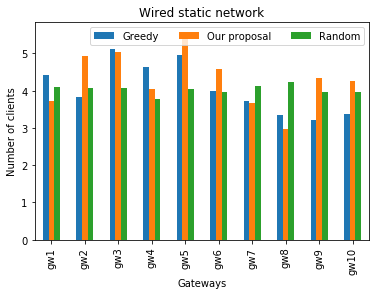

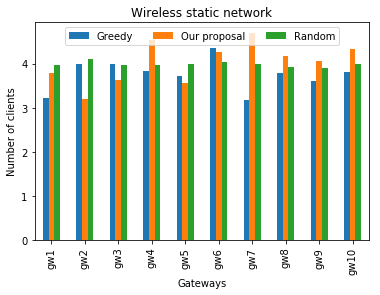

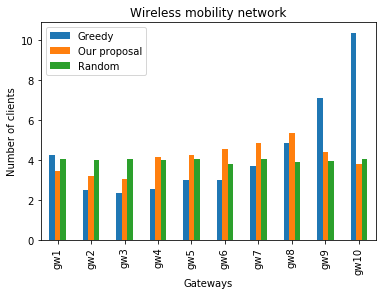

In [49]:
df = pd.DataFrame({'Greedy': wiredGreedy[0],
                   'Our proposal':wiredPower2[0],
                   'Random':wiredRandom[0]})
df.plot.bar()
plt.legend(ncol=3)
plt.title('Wired static network')
plt.xlabel('Gateways')
plt.ylabel('Number of clients')
plt.show()

df = pd.DataFrame({'Greedy':wirelessGreedy[0], 
                               'Our proposal':wirelessPower2[0], 
                                   'Random':wirelessRandom[0]})
df.plot.bar()
plt.title('Wireless static network')
plt.legend(loc='upper center', ncol=3)

plt.xlabel('Gateways')
plt.ylabel('Number of clients')
plt.show()


df = pd.DataFrame({'Greedy':mobilityGreedy[0], 
                               'Our proposal':mobilityPower2[0], 
                                   'Random':mobilityRandom[0]})
df.plot.bar()
plt.title('Wireless mobility network')
plt.xlabel('Gateways')
plt.ylabel('Number of clients')
plt.show()


In [2]:
#EXP_NAME = "tolerance/15"

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name):
    
    headers = ['time', 'latency']
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='1min')]).mean()

def getECDF(df, attr):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[attr].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

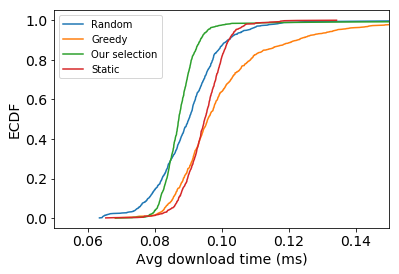

In [92]:
import warnings
warnings.filterwarnings('ignore')

headers = ['time', 'latency']


fig, ax = plt.subplots()

INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

#fig, ax = plt.subplots()
getECDF(numbers,'latency').plot(ax=ax)

INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

getECDF(numbers,'latency').plot(ax=ax)




INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("wired/static/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)


plt.legend([ 'Random','Greedy','Our selection', 'Static'])
#plt.legend(['Greedy', 'Random', 'Static'])
plt.ylabel('ECDF', fontsize=14)
plt.xlabel('Avg download time (ms)', fontsize=14)
ax.tick_params(labelsize=14)
plt.xlim(0.05,0.15)
plt.show()
    


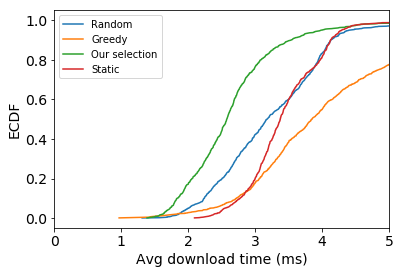

In [79]:
headers = ['time', 'latency']
fig, ax = plt.subplots()



INPUT_DIR = os.path.join("randomPower2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("power2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("select_once/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


plt.legend(['Random', 'Greedy','Our selection','Static'])
#plt.legend(['Greedy','Random','Static'])
plt.ylabel('ECDF', fontsize=14)
plt.xlabel('Avg download time (ms)', fontsize=14)
ax.tick_params(labelsize=14)
#plt.title('Wireless network')
plt.xlim(0,5)
plt.show()
    

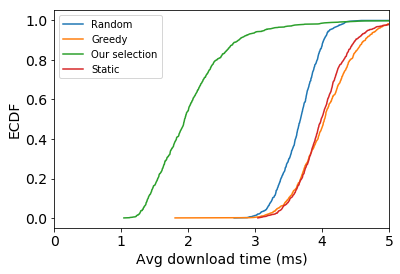

In [91]:
fig, ax = plt.subplots()

INPUT_DIR = os.path.join("complete_random/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)

INPUT_DIR = os.path.join("brute/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("power2/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)


INPUT_DIR = os.path.join("select_once/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)

plt.legend(['Random','Greedy','Our selection','Static'])
#plt.legend(['Greedy','Random','Static'])
plt.ylabel('ECDF', fontsize=14)
plt.xlabel('Avg download time (ms)', fontsize=14)
ax.tick_params(labelsize=14)
#plt.title('Mobile network')
plt.xlim(0,5)
plt.show()    

# Finding the effect of density affects to the download time

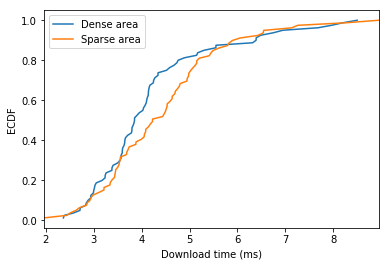

In [42]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 


INPUT_DIR = os.path.join("sparse/download/dense")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
dense =  read_gateway_users(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'latency').plot()



INPUT_DIR = os.path.join("sparse/download/sparse")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
sparse =  read_gateway_users(os.path.join(INPUT_DIR))

getECDF(sparse,'latency').plot(ax=ax)
plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.show()

In [44]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'candidates']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_candidates(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='2min')]).mean()


# Number of available candidates sparse vs dense area

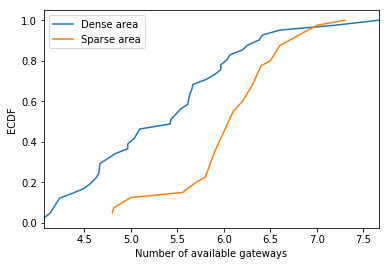

In [45]:

INPUT_DIR = os.path.join("sparse/candidates/dense")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
dense =  read_gateway_candidates(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'candidates').plot()



INPUT_DIR = os.path.join("sparse/candidates/sparse")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
sparse =  read_gateway_candidates(os.path.join(INPUT_DIR))

getECDF(sparse, 'candidates').plot(ax=ax)

plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Number of available gateways')
plt.show()

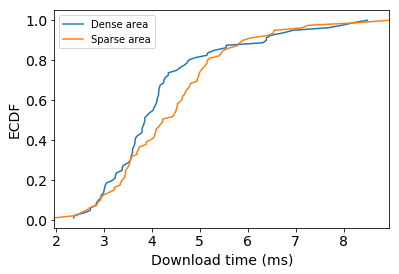

In [119]:
headers = ['time', 'latency']
ax = getECDF(read_gateway_users(os.path.join('sparse/download/dense')),'latency').plot()
getECDF(read_gateway_users(os.path.join("sparse/download/sparse")),'latency').plot(ax=ax)
plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF',fontsize=14)
plt.xlabel('Download time (ms)',fontsize=14)
ax.tick_params(labelsize=14)
plt.show()

# Number of selection choices D=[1,2,3,4]

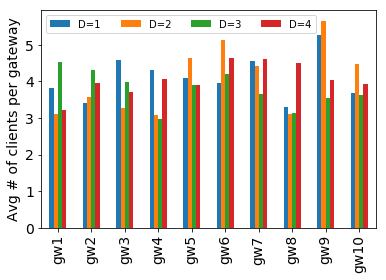

In [122]:
headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean()
    

df = pd.DataFrame({'D=1':read_clients_per_gateway('multiD/1/gwChange'),
                   'D=2':read_clients_per_gateway('multiD/2/gwChange'),
                  'D=3':read_clients_per_gateway('multiD/3/gwChange'),
                  'D=4':read_clients_per_gateway('multiD/4/gwChange')})
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']


ax = df.plot.bar(rot=90)
plt.legend(loc='upper left', ncol=4)
ax.set_xticklabels(columns)
plt.ylabel('Avg # of clients per gateway',fontsize=14)
plt.xlabel('')
ax.tick_params(labelsize=14)
plt.show()
        


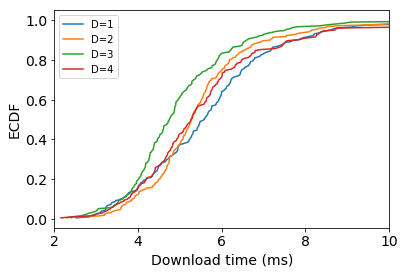

In [123]:
headers = ['time', 'latency']
fig, ax = plt.subplots()
ax = getECDF(read_gateway_users(os.path.join("multiD/1/download")),'latency').plot()

getECDF(read_gateway_users(os.path.join("multiD/2/download")),'latency').plot(ax=ax)
getECDF(read_gateway_users(os.path.join("multiD/3/download")),'latency').plot(ax=ax)
getECDF(read_gateway_users(os.path.join("multiD/4/download")),'latency').plot(ax=ax)


#columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
plt.legend(loc='upper left', ncol=4)
#ax.set_xticklabels(columns)

plt.legend(['D=1','D=2','D=3','D=4'])
plt.ylabel('ECDF',fontsize=14)
plt.xlabel('Download time (ms)',fontsize=14)
ax.tick_params(labelsize=14)
plt.xlim(2, 10)
plt.show()
    

# Performance varied gateway nodes experiment

Here 3 gateways are configured with bad latency
2 gateways are configured with varying latency
5 remaining gateways are configured with normal latency

The idea is to see if client nodes are avoiding from the bad gateways and focusing more on the good gateways

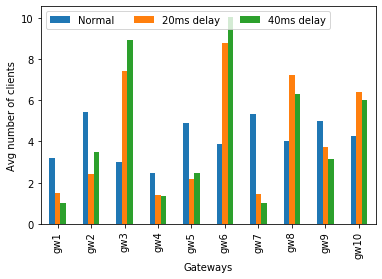

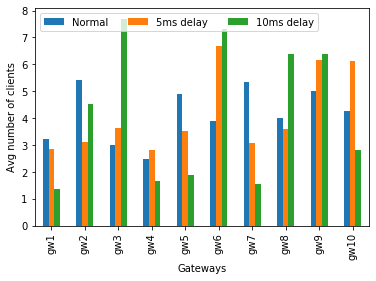

In [22]:
headers = ['time', 'gateway']

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_5ms/gwChange")
numbers= numbers.append(temp)
var_5ms = numbers.groupby(numbers.index).mean().reset_index()
var_5ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_5ms = var_5ms.set_index(var_5ms['gateway'])

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_10ms/gwChange")
numbers= numbers.append(temp)
var_10ms = numbers.groupby(numbers.index).mean().reset_index()
var_10ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_10ms = var_10ms.set_index(var_10ms['gateway'])

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_20ms/gwChange")
numbers= numbers.append(temp)
var_20ms = numbers.groupby(numbers.index).mean().reset_index()
var_20ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_20ms = var_20ms.set_index(var_20ms['gateway'])

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_40ms/gwChange")
numbers= numbers.append(temp)
var_40ms = numbers.groupby(numbers.index).mean().reset_index()
var_40ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_40ms =  var_40ms.set_index(var_40ms['gateway'])


numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/normal/gwChange")
numbers= numbers.append(temp)



#var_normal = numbers.groupby(numbers.index)
#columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

var_normal = var_normal.mean().reset_index()
var_normal['gateway'] = columns
var_normal = var_normal.set_index(var_normal['gateway'])


variance = pd.DataFrame({
    "Normal": var_normal[0],
    #"10ms delay": var_10ms[0],
    "20ms delay": var_20ms[0],
    "40ms delay": var_40ms[0]
})
variance.plot.bar()
plt.legend(loc='upper left', ncol=4)
plt.xlabel('Gateways')
plt.ylabel('Avg number of clients')
plt.show()

variance = pd.DataFrame({
    "Normal": var_normal[0],
    "5ms delay": var_5ms[0],
    "10ms delay": var_10ms[0],
})
variance.plot.bar()
plt.legend(loc='upper left', ncol=4)
plt.xlabel('Gateways')
plt.ylabel('Avg number of clients')
plt.show()

14.333333333333334 10.35897435897436 8.225


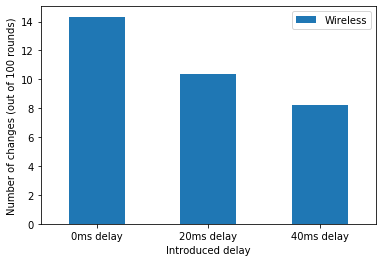

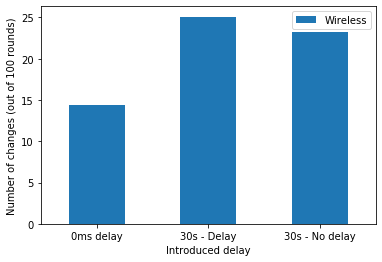

In [133]:
headers = ['time', 'gateway']


numbers5ms = read_gateway_change("cpuVariance/variance_5ms/gwChange")
numbers10ms = read_gateway_change("cpuVariance/variance_10ms/gwChange")
numbers40ms = read_gateway_change("cpuVariance/variance_40ms/gwChange")
numbers20ms = read_gateway_change("cpuVariance/variance_20ms/gwChange")
numbersNormal = read_gateway_change("cpuVariance/normal/gwChange")

print(numbersNormal, numbers20ms, numbers40ms)
df = pd.DataFrame({'Wireless':{
                  '0ms delay':numbersNormal, 
                  #'5ms delay':numbers5ms, 
                  #'10ms delay':numbers10ms,
                  '20ms delay':numbers20ms, 
                  '40ms delay':numbers40ms}},)
#df.sort_values()
df.plot.bar(rot=360)
plt.ylabel("Number of changes (out of 100 rounds)")
plt.xlabel('Introduced delay')
plt.show()


numbers30s = read_gateway_change("freq_variance/freq_download_nodelay/gwChange")
numbers30sDelay = read_gateway_change("freq_variance/freq_download_delay/gwChange")

df = pd.DataFrame({'Wireless':{
                  '0ms delay':numbersNormal, 
                  #'5ms delay':numbers5ms, 
                  #'10ms delay':numbers10ms,
                  '30s - No delay':numbers30s, 
                  '30s - Delay':numbers30sDelay}},)
#df.sort_values()
df.plot.bar(rot=360)
plt.ylabel("Number of changes (out of 100 rounds)")
plt.xlabel('Introduced delay')
plt.show()

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


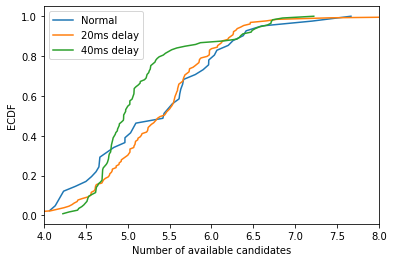

In [48]:
headers = ['time', 'candidates']

INPUT_DIR = os.path.join("cpuVariance/normal/candidates")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
cand_normal =  read_gateway_candidates(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'candidates').plot()

INPUT_DIR = os.path.join("cpuVariance/variance_20ms/candidates")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
cand_20ms =  read_gateway_candidates(os.path.join(INPUT_DIR))
getECDF(cand_20ms, 'candidates').plot(ax=ax)


INPUT_DIR = os.path.join("cpuVariance/variance_40ms/candidates")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
cand_40ms =  read_gateway_candidates(os.path.join(INPUT_DIR))
getECDF(cand_40ms, 'candidates').plot(ax=ax)

plt.legend(['Normal','20ms delay','40ms delay'])
plt.ylabel('ECDF')
plt.xlabel('Number of available candidates')
plt.xlim(4,8)
plt.show()

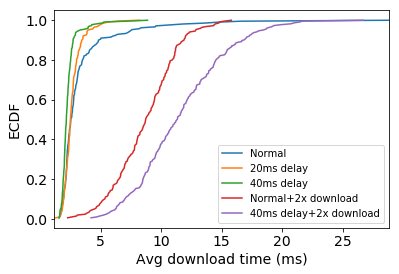

In [89]:
header = ['time','latency']

downloadNormal = read_gateway_users(os.path.join("cpuVariance/normal/download"))
download20ms = read_gateway_users(os.path.join("cpuVariance/variance_20ms/download"))
download40ms = read_gateway_users(os.path.join("cpuVariance/variance_40ms/download"))

#print(downloadNormal)
ax = getECDF(downloadNormal,'latency').plot()
getECDF(download20ms,'latency').plot(ax=ax)
getECDF(download40ms,'latency').plot(ax=ax)

#plt.xlim(0,10)

#plt.legend(['Normal','20ms delay','40ms delay'])
#plt.ylabel('ECDF')
#plt.xlabel('Avg download time (ms)')
#plt.show()


header = ['time','latency']

downloadNormal = read_gateway_users(os.path.join("cpuVariance/normal/download"))
downloadFreq = read_gateway_users(os.path.join("freq_variance/freq_download_nodelay/download"))
downloadFreqDelay = read_gateway_users(os.path.join("freq_variance/freq_download_delay/download"))

#print(downloadNormal)
#getECDF(downloadNormal,'latency').plot(ax=ax)
getECDF(downloadFreq,'latency').plot(ax=ax)
getECDF(downloadFreqDelay,'latency').plot(ax=ax)

#plt.xlim(0,10)

plt.legend(['Normal','20ms delay',  '40ms delay', 'Normal+2x download' ,'40ms delay+2x download' ])
plt.ylabel('ECDF',fontsize=14)
plt.xlabel('Avg download time (ms)', fontsize=14)
ax.tick_params(labelsize=14)
#plt.xlim(0,15)
plt.show()

In [83]:
import warnings
warnings.filterwarnings('ignore')

def read_gwChange(dir_name):
    headers = ['time','gateway']
    
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        gw_data['round'] = list(range(len(gw_data)))
        data = data.append(gw_data)
    
    returnData = pd.DataFrame()
    
    for name, group  in data.groupby([data['gateway']]):
        temp = pd.DataFrame()
        t = group['time'].groupby([group['round']]).count()
        temp['count'] = t
        temp['gateway'] = name
        returnData = returnData.append(temp)
    return returnData    
    

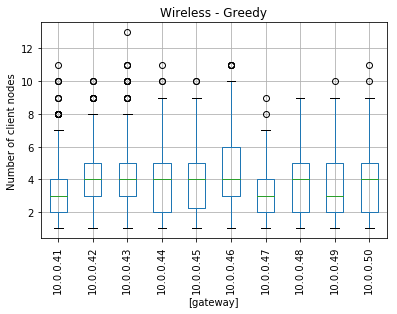

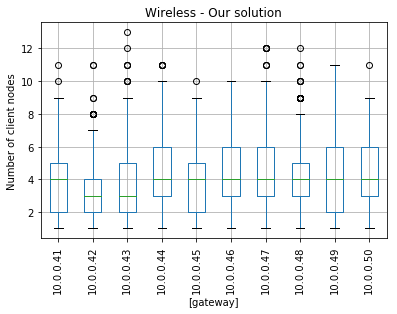

In [42]:
INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.title('Wireless - Greedy')
plt.ylabel('Number of client nodes')
plt.show()

INPUT_DIR = os.path.join("power2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Our solution")
plt.show()



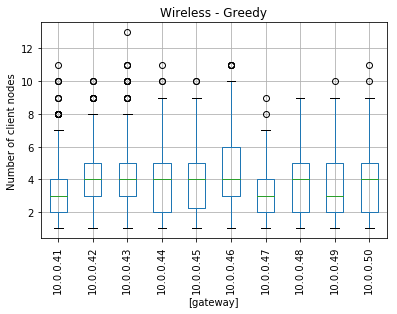

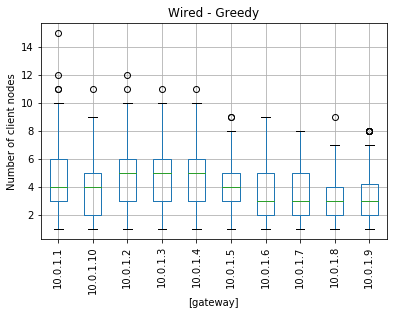

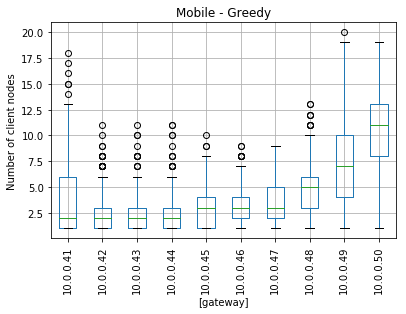

In [111]:
INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Greedy")
plt.show()


INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wired - Greedy")
plt.show()


INPUT_DIR = os.path.join("brute/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Mobile - Greedy")
plt.show()

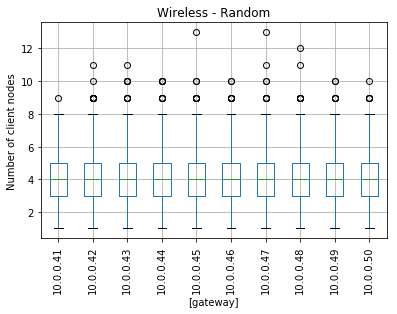

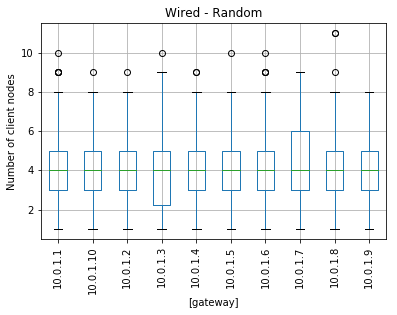

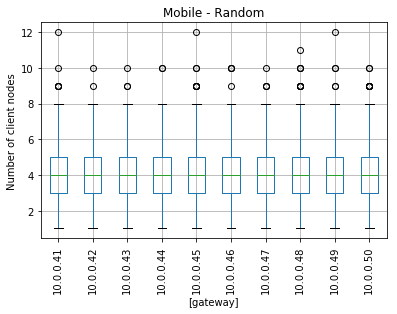

In [33]:
INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Random")
plt.show()


INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wired - Random")
plt.show()


INPUT_DIR = os.path.join("complete_random/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Mobile - Random")
plt.show()


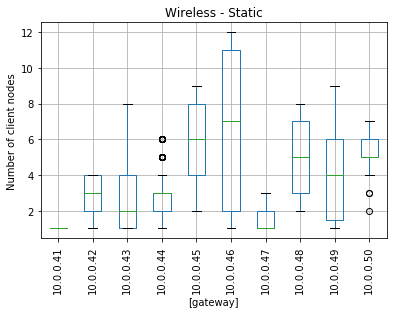

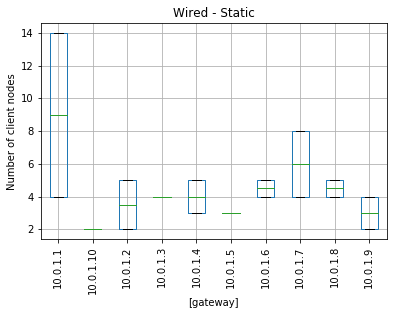

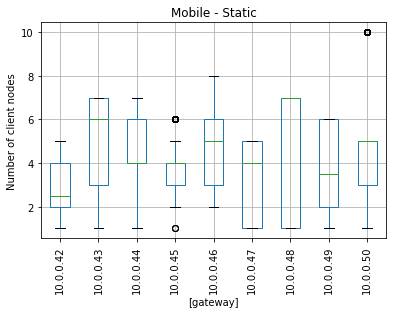

In [31]:
INPUT_DIR = os.path.join("select_once/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Static")
plt.show()


INPUT_DIR = os.path.join("wired/static/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wired - Static")
plt.show()


INPUT_DIR = os.path.join("select_once/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Mobile - Static")
plt.show()


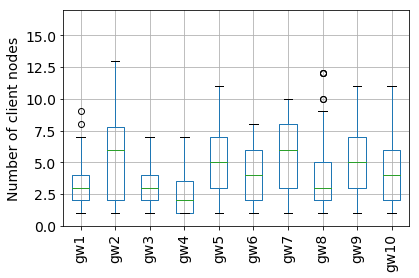

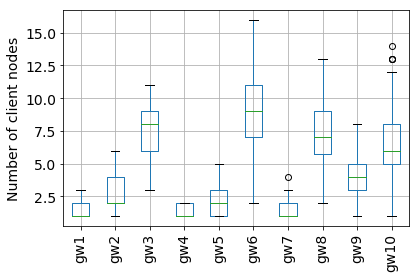

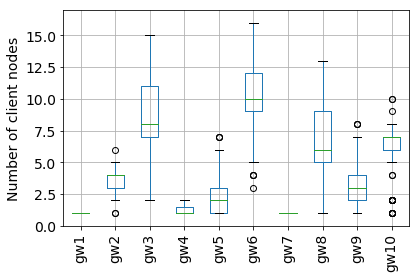

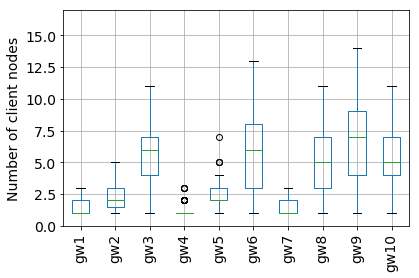

In [87]:

columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']


INPUT_DIR = os.path.join("cpuVariance/normal/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
temp = read_gwChange("cpuVariance/normal/gwChange")
numbers= numbers.append(temp)
ax = numbers.boxplot(by='gateway',rot=90)
ax.set_xticklabels(columns)

plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
plt.ylim(0,17)
plt.show()


numbers = pd.DataFrame()
temp = read_gwChange("cpuVariance/variance_20ms/gwChange")
numbers= numbers.append(temp)
ax = numbers.boxplot(by='gateway',rot=90)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
#plt.ylim(0,16)
plt.show()


INPUT_DIR = os.path.join("cpuVariance/variance_40ms/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
temp = read_gwChange("cpuVariance/variance_40ms/gwChange")
numbers= numbers.append(temp)
ax= numbers.boxplot(by='gateway',rot=90)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)

plt.ylim(0,17)
plt.show()





numbers = pd.DataFrame()
temp = read_gwChange("freq_variance/freq_download_delay/gwChange")
numbers= numbers.append(temp)
ax = numbers.boxplot(by='gateway',rot=90)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
plt.ylim(0,17)
plt.show()



In [10]:
header = ['time','latency']

downloadNormal = read_gateway_users(os.path.join("cpuVariance/normal/download"))
download40ms= read_gateway_users(os.path.join("cpuVariance/variance_40ms/download"))

ax = getECDF(downloadNormal,'latency').plot()
getECDF(download40ms,'latency').plot(ax=ax)

plt.legend(['Normal','40ms delay'])
plt.ylabel('ECDF')
plt.xlabel('Avg download time (ms)')
plt.show()

NameError: name 'read_gateway_users' is not defined

# Gateway distribution of random delay introduced network - static setting

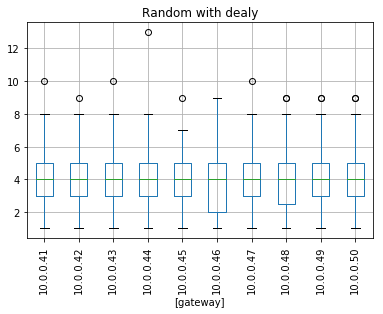

In [20]:
header = ['time','gateway']
numbers = pd.DataFrame()

temp = read_gwChange("cpuVariance/random/delay/gwChange")
numbers= numbers.append(temp)

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.title("Random with dealy")
plt.suptitle('')
plt.show()


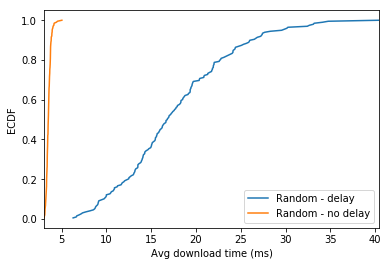

In [26]:
header = ['time','latency']

downloadDelay = read_gateway_users(os.path.join("cpuVariance/random/delay/download"))
downloadNoDelay= read_gateway_users(os.path.join("cpuVariance/random/nodelay/download"))

ax = getECDF(downloadDelay,'latency').plot()
getECDF(downloadNoDelay,'latency').plot(ax=ax)

plt.legend(['Random - delay','Random - no delay'])
plt.ylabel('ECDF')
plt.xlabel('Avg download time (ms)')
plt.show()

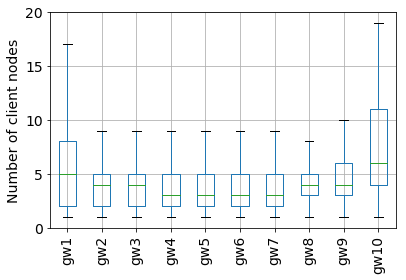

In [60]:
INPUT_DIR = os.path.join("combinedDistribution/greedy")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

ax = None
legend = []
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
ax = numbers.boxplot(by='gateway', rot=90, showfliers=False)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
plt.ylim(0,20)
plt.show()

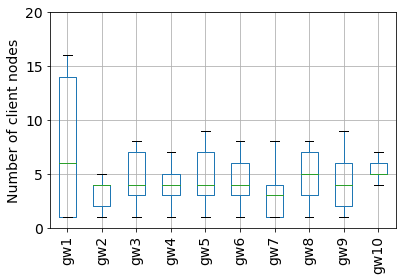

In [59]:
INPUT_DIR = os.path.join("combinedDistribution/static")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

ax = None
legend = []
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
ax = numbers.boxplot(by='gateway', rot=90, showfliers=False)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
plt.ylim(0,20)
plt.show()

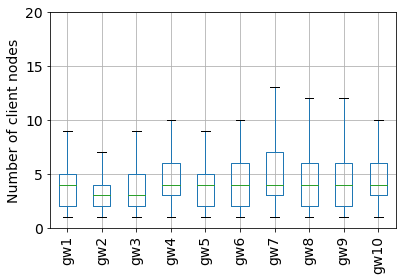

In [58]:
INPUT_DIR = os.path.join("combinedDistribution/our")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

ax = None
legend = []

columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
ax = numbers.boxplot(by='gateway', rot=90, showfliers=False)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
plt.ylim(0,20)
plt.show()

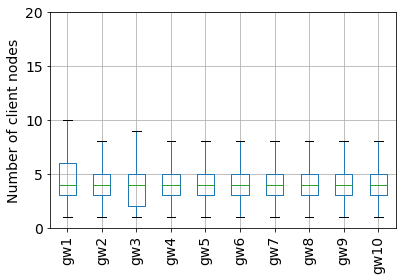

In [5]:
INPUT_DIR = os.path.join("combinedDistribution/random")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

ax = None
legend = []

columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
ax = numbers.boxplot(by='gateway', rot=90, showfliers=False)
ax.set_xticklabels(columns)
plt.suptitle('')
plt.title('')
plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('', fontsize=14)
ax.tick_params(labelsize=14)
plt.ylim(0,20)
plt.show()

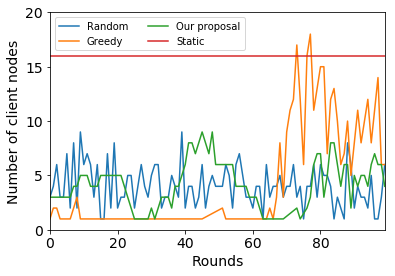

In [117]:
greedyOne = read_gwChange('combinedDistribution/random/r5/gwChange/')
ax = greedyOne[greedyOne['gateway'] == '10.0.0.41']['count'].plot()
#greedyOne[greedyOne['gateway'] == '10.0.0.49']['count'].plot(kind='bar')
#plt.legend(['gw1'])

greedyOne = read_gwChange('combinedDistribution/greedy/r5/gwChange/')
greedyOne[greedyOne['gateway'] == '10.0.0.41']['count'].plot(ax=ax)

greedyOne = read_gwChange('combinedDistribution/our/r3_w/gwChange/')
greedyOne[greedyOne['gateway'] == '10.0.0.41']['count'].plot(ax=ax)

greedyOne = read_gwChange('combinedDistribution/static/r1/gwChange/')
greedyOne[greedyOne['gateway'] == '10.0.0.41']['count'].plot()


plt.legend(['Random','Greedy','Our proposal', 'Static'], ncol=2)

plt.ylabel('Number of client nodes', fontsize=14)
plt.xlabel('Rounds', fontsize=14)
plt.ylim(0,20)
ax.tick_params(labelsize=14)

plt.show()


**Throughput calculation

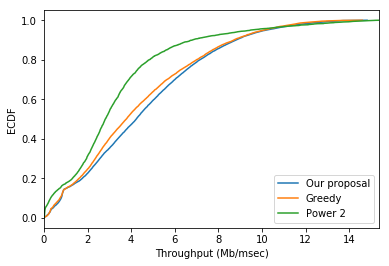

In [3]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 
import numpy as np


headers = ['time', 'download','gateway', 'file']

#Read input files from the directory and returns DataTable object in a combined list
def read_download_throughput(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
        
    return data
df = pd.DataFrame()
df = read_download_throughput("download_throughput/ours/r2")
df.loc[(df['file'] == '10Mb.dat'),'file'] = 10
df.loc[(df['file'] == '1Mb.dat'),'file'] = 1
df.loc[(df['file'] == '100Mb.dat'),'file'] = 100
df['throughput'] = df['file']/df['download']
#df = pd.DataFrame(df.resample('1Min','throughput').mean())
#df['round'] = np.array([x for x in range(0,len(df+1))]).reshape(-1,1)
#df = df.set_index(df['round'])
ax = getECDF(df, 'throughput').plot()
#plt.show()

df = pd.DataFrame()
df = read_download_throughput("download_throughput/greedy/r2")
df.loc[(df['file'] == '10Mb.dat'),'file'] = 10
df.loc[(df['file'] == '1Mb.dat'),'file'] = 1
df.loc[(df['file'] == '100Mb.dat'),'file'] = 100
df['throughput'] = df['file']/df['download']
#df = pd.DataFrame(df.resample('1Min','throughput').mean())
#df['round'] = np.array([x for x in range(0,len(df+1))]).reshape(-1,1)
#df = df.set_index(df['round'])
getECDF(df, 'throughput').plot(ax=ax)

df = pd.DataFrame()
df = read_download_throughput("download_throughput/power2")
df.loc[(df['file'] == '10Mb.dat'),'file'] = 10
df.loc[(df['file'] == '1Mb.dat'),'file'] = 1
df.loc[(df['file'] == '100Mb.dat'),'file'] = 100
df['throughput'] = df['file']/df['download']
#df = pd.DataFrame(df.resample('1Min','throughput').mean())
#df['round'] = np.array([x for x in range(0,len(df+1))]).reshape(-1,1)
#df = df.set_index(df['round'])
getECDF(df, 'throughput').plot(ax=ax)

#10gws and 20 clients



plt.legend(['Our proposal', 'Greedy', 'Power 2', 'Static'])
plt.ylabel('ECDF')
plt.xlabel('Throughput (Mb/msec)')
#plt.xlim(0,6)
plt.show()

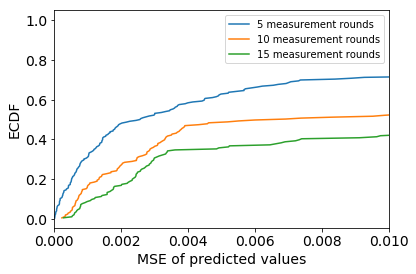

In [33]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

headers = ['time', 'gateway', 'latency','actual_latency', 'category']

#Read input files from the directory and returns DataTable object in a combined list
def read_prediction_stability(dir_name):
    #Get list of nodes(files) with results
    #INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    #dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    #for client in dirs:
    gw_data = pd.read_csv(dir_name)
    gw_data.columns= headers
    gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))        
    return gw_data

#def predict_accuracy(values, actual_value, windows_size):
    

df = read_prediction_stability("gwtable_stability/r2/gwtable_2_10.0.0.4")

stdev = df['latency'].std()

window_size = [5, 10, 15]
group5 = pd.DataFrame()
group10 = pd.DataFrame()
group15 = pd.DataFrame()
fig, ax = plt.subplots()
legends = ['5 measurement rounds', '10 measurement rounds', '15 measurement rounds']
for name, group  in df.groupby(['gateway']):
    #if name in ['10.0.0.23','10.0.0.27','10.0.0.25', '10.0.0.26','10.0.0.28']:
    #    continue
    if group['latency'].std() > stdev:
    #if (group['latency'].std()) > stdev:
        #group['latency'].plot()
        #plt.show()
    #print(name, group.describe())
        for window in window_size:
            cnt = 0
            predictions  = pd.DataFrame()
            avg = 0
            i_cnt = 0
            while cnt< (len(group)-(window+1)):
                Y = group[cnt:cnt+window]['latency'].array
                #print(stdev, )
                avg += group[cnt:cnt+window]['latency'].std()
                actual = group.head(cnt+window+1)['latency'].array[cnt+window]
                X = np.array([x for x in range(0,len(Y))]).reshape(-1,1)
                model = LinearRegression().fit(X,Y)
                prediction = model.predict(np.array([x for x in range(0,len(Y)+1)]).reshape(-1,1)) 
                actual = group[cnt:cnt+window+1]['latency'].array 
                predictions = predictions.append({'MSE':mean_squared_error(actual,prediction)}, ignore_index=True)
                cnt+=1
        
            #print(name, group['latency'].mean(), window, avg/cnt)
            if window == 5:
                group5 = group5.append(predictions)
            elif window ==10:
                group10 = group10.append(predictions)
            else:            
                group15 = group15.append(predictions)

        
        
getECDF(group5, 'MSE').plot(ax =ax)
getECDF(group10, 'MSE').plot(ax=ax)
getECDF(group15, 'MSE').plot(ax=ax)
plt.legend(legends)
plt.xlim(0, 0.01)
plt.ylabel('ECDF', fontsize=14)
plt.xlabel('MSE of predicted values', fontsize=14)
ax.tick_params(labelsize=14)
plt.show()
    